In [5]:
import Haar
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from tqdm.notebook import tqdm
from scipy.stats import spearmanr, kendalltau

In [6]:
n_im = 25 # 25
n_dist = 24 #24
n_level = 5

haar_score = np.zeros((n_im,n_dist,n_level)) #25 distorts, 24 images,5levels of distortion
for i in tqdm(range(1, n_im + 1)): # over images

    # download target image
    im_path = 'reference_images/i' + "{0:0=2d}".format(i) + '.bmp'
    I_t = np.array(ImageOps.grayscale(Image.open(im_path)))
    for d in range(1, n_dist + 1): # over distortion types
            for l in range(1, n_level + 1): # over level of distortion 
                im_path = 'distorted_images/i' + "{0:0=2d}".format(i) + '_' + "{0:0=2d}".format(d) + '_' + str(l) + '.bmp'
                i_d = np.array(ImageOps.grayscale(Image.open(im_path)))
                haar_score[i-1,d-1,l-1]=Haar.haar_psi(I_t,i_d)[0]

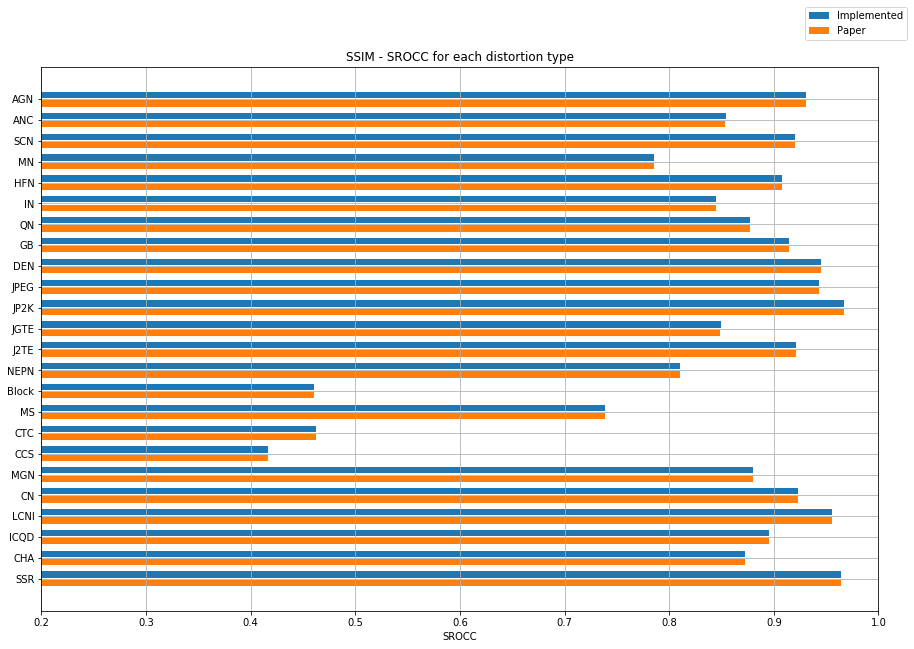

In [7]:
mos = open('mos.txt', 'r').read().split('\n')
mos = np.array([float(i) for i in mos])
mos_tens = mos.reshape(n_im,n_dist,n_level)
SROCC = np.array([spearmanr(haar_score[:,d, :].flatten(), mos_tens[:,d, :].flatten())[0] for d in range(n_dist)])
KROCC = np.array([kendalltau(haar_score[:,d, :].flatten(), mos_tens[:,d, :].flatten())[0] for d in range(n_dist)])

#plot
fig, ax = plt.subplots(figsize=(15,10))

h = 0.3
distortions = ('AGN','ANC','SCN','MN','HFN','IN','QN','GB','DEN','JPEG','JP2K','JGTE','J2TE','NEPN','Block','MS','CTC','CCS','MGN','CN','LCNI','ICQD','CHA','SSR')
paper_SROCC = [0.9304,0.8536,0.9199,0.7851,0.9074,0.8447,0.8773,0.9149,0.945,0.943,0.9675,0.849,0.9214,0.8104,0.4601,0.7389,0.462,0.417,0.8803,0.9229,0.9558,0.8958,0.8723,0.9642]
y_pos = np.arange(len(distortions))

w=0.2
ax.barh(y_pos-w, abs(SROCC), height=h,align='center', label='Implemented')
ax.barh(y_pos+w, paper_SROCC, height=h,align='center', label='Paper')
ax.set_yticks(y_pos)
ax.set_yticklabels(distortions)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('SROCC')
ax.set_title('SSIM - SROCC for each distortion type')

plt.xlim(0.2,1)
plt.grid()
plt.legend(bbox_to_anchor=(0.04, 0.82, 1., .3))
plt.show()

In [8]:
SROCC

array([ 0.93041411,  0.8540096 ,  0.91996074,  0.78515986,  0.9075045 ,
        0.84473918,  0.87734029,  0.91490244,  0.94519279,  0.94322366,
        0.96742976,  0.84903394,  0.92147866,  0.81042527,  0.46019847,
        0.73910926,  0.46224082, -0.4166275 ,  0.88038255,  0.92296325,
        0.95595471,  0.89584575,  0.87231526,  0.9642839 ])

In [9]:
KROCC

array([ 0.75797088,  0.64953532,  0.74248102,  0.60435102,  0.69912852,
        0.641695  ,  0.69180131,  0.74067386,  0.81763618,  0.78241795,
        0.84644687,  0.6583194 ,  0.74436919,  0.6056736 ,  0.31062333,
        0.54796654,  0.34026077, -0.29043503,  0.68198548,  0.7614438 ,
        0.81523581,  0.7062468 ,  0.7127921 ,  0.84169091])

In [11]:
spearmanr(haar_score.flatten(),mos_tens.flatten())[0]

0.8093832351124297

In [12]:
kendalltau(haar_score.flatten(),mos_tens.flatten())[0]

0.6372284767459401